In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Load training and test datasets
df_train = pd.read_csv('/kaggle/input/ai-cure-parsec/train_data.csv')
df_test_X = pd.read_csv('/kaggle/input/ai-cure-parsec/sample_test_data.csv')
df_test_Y = pd.read_csv('/kaggle/input/ai-cure-parsec/sample_output_generated.csv')

In [3]:
# Merge test data with corresponding output labels using 'uuid' as the key
df_test = pd.merge(df_test_X,df_test_Y, on = 'uuid' , how = 'inner')

In [4]:
df_train.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,4a122afe-6e52-4ed0-840d-66155da95ba1,2259.833995,67.884986,1058.573968,31.799362,99.017120,10.507787,0.315652,0.982880,3328.915749,...,-0.812408,-0.156490,-0.000055,-0.000191,0.017395,0.007729,0.007729,2.250533,-0.812408,-0.156490
1,0848f722-52ec-420c-adb1-a1e90a2e2709,2430.367576,60.980572,1541.466293,38.677070,99.122594,13.644635,0.342359,0.877406,3985.478504,...,0.014594,-0.595771,-0.000035,-0.000671,0.021513,0.011262,0.011262,1.910181,0.014594,-0.595771
2,7814286a-f939-45a7-8620-82b339a7ad4b,989.800997,27.651929,2478.164707,69.232133,95.693128,111.535043,3.115939,4.306872,3579.500746,...,-0.470107,0.170303,0.000080,-0.001355,0.029976,0.015781,0.015781,1.899494,-0.470107,0.170303
3,de843d67-0ed3-4dfe-af91-78923dc31810,2025.914557,57.014236,1464.561241,41.216368,95.883762,62.872820,1.769396,4.116238,3553.348618,...,0.176038,-0.506675,0.000024,0.000587,0.023851,0.011562,0.011562,2.062848,0.176038,-0.506675
4,ba117ec1-3de8-4da3-a315-4c7716589439,1576.443907,71.274370,619.624143,28.014521,97.524479,15.728281,0.711109,2.475521,2211.796331,...,0.410326,0.208714,-0.000109,-0.000151,0.014282,0.007043,0.007043,2.027828,0.410326,0.208714


In [5]:
df_train.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

In [6]:
# Selecting the columns of interest
columns_of_interest = [
    'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
    'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
    'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
    'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT',
    'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1',
    'SD2', 'higuci','sampen'
]

target_column = 'HR'

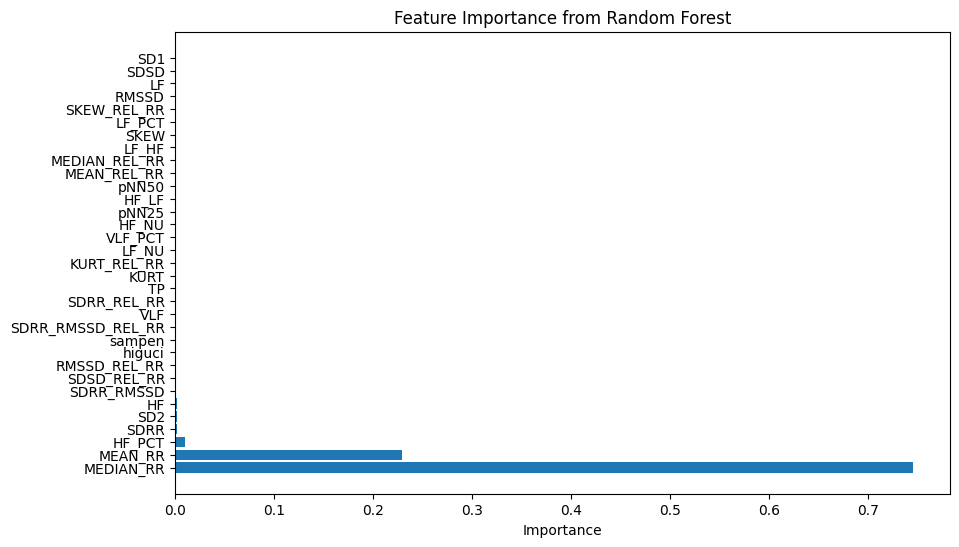

In [7]:
# Extract features and target variable from the training dataset
X = df_train[columns_of_interest]
y = df_train[target_column]

# Initialize a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [8]:
# Calculate correlations with HR
correlations_with_hr = df_train[columns_of_interest].corrwith(df_train['HR'])

# Displaying the correlations
print(correlations_with_hr)

MEAN_RR             -0.943725
MEDIAN_RR           -0.927397
SDRR                -0.210253
RMSSD               -0.295959
SDSD                -0.295949
SDRR_RMSSD          -0.088706
pNN25               -0.274146
pNN50               -0.126235
KURT                 0.297863
SKEW                 0.303769
MEAN_REL_RR          0.002380
MEDIAN_REL_RR        0.074035
SDRR_REL_RR          0.234775
RMSSD_REL_RR         0.505095
SDSD_REL_RR          0.505095
SDRR_RMSSD_REL_RR   -0.677232
KURT_REL_RR          0.297863
SKEW_REL_RR          0.303769
VLF                 -0.318167
VLF_PCT             -0.255635
LF                  -0.108677
LF_PCT               0.193269
LF_NU               -0.731351
HF                   0.650439
HF_PCT               0.665585
HF_NU                0.731351
TP                  -0.317456
LF_HF               -0.414726
HF_LF                0.709137
SD1                 -0.295949
SD2                 -0.209897
higuci               0.429574
sampen              -0.304726
dtype: flo

In [9]:
# Sort correlations by absolute values in descending order
correlations_with_hr_abs = correlations_with_hr.abs().sort_values(ascending=False)
print(correlations_with_hr_abs)

MEAN_RR              0.943725
MEDIAN_RR            0.927397
HF_NU                0.731351
LF_NU                0.731351
HF_LF                0.709137
SDRR_RMSSD_REL_RR    0.677232
HF_PCT               0.665585
HF                   0.650439
SDSD_REL_RR          0.505095
RMSSD_REL_RR         0.505095
higuci               0.429574
LF_HF                0.414726
VLF                  0.318167
TP                   0.317456
sampen               0.304726
SKEW_REL_RR          0.303769
SKEW                 0.303769
KURT_REL_RR          0.297863
KURT                 0.297863
RMSSD                0.295959
SD1                  0.295949
SDSD                 0.295949
pNN25                0.274146
VLF_PCT              0.255635
SDRR_REL_RR          0.234775
SDRR                 0.210253
SD2                  0.209897
LF_PCT               0.193269
pNN50                0.126235
LF                   0.108677
SDRR_RMSSD           0.088706
MEDIAN_REL_RR        0.074035
MEAN_REL_RR          0.002380
dtype: flo

In [10]:
X_train = X
y_train = y
X_test = df_test[columns_of_interest]
y_test = df_test['HR']

# Standardize the features (important for LASSO regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the LASSO regression model
lasso = Lasso(alpha=0.001)  # You can adjust the alpha parameter for regularization strength
lasso.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the coefficients of the features
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print(coefficients)

Mean Squared Error: 2.237404917025958
              Feature  Coefficient
0             MEAN_RR   -12.304872
1           MEDIAN_RR     2.069913
2                SDRR     2.540587
3               RMSSD    -0.233635
4                SDSD    -0.000000
5          SDRR_RMSSD     0.115882
6               pNN25     2.533728
7               pNN50     0.622638
8                KURT     0.029791
9                SKEW     0.224050
10        MEAN_REL_RR    -0.066848
11      MEDIAN_REL_RR     0.279050
12        SDRR_REL_RR     0.103673
13       RMSSD_REL_RR     1.835443
14        SDSD_REL_RR     0.000000
15  SDRR_RMSSD_REL_RR     0.352103
16        KURT_REL_RR     0.000000
17        SKEW_REL_RR     0.000000
18                VLF     0.543690
19            VLF_PCT    -0.392051
20                 LF    -0.497157
21             LF_PCT     0.567865
22              LF_NU     4.591710
23                 HF     0.071559
24             HF_PCT     0.424227
25              HF_NU    -0.330217
26               

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.725e+02, tolerance: 5.538e+01
  model = cd_fast.enet_coordinate_descent(


In [11]:
# Calculate and plot feature importances from LASSO regression
coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()
sorted_coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

print(sorted_coefficients)

              Feature  Coefficient  Absolute_Coefficient
0             MEAN_RR   -12.304872             12.304872
28              HF_LF     4.819774              4.819774
22              LF_NU     4.591710              4.591710
29                SD1    -4.184124              4.184124
2                SDRR     2.540587              2.540587
6               pNN25     2.533728              2.533728
1           MEDIAN_RR     2.069913              2.069913
13       RMSSD_REL_RR     1.835443              1.835443
27              LF_HF     0.683610              0.683610
7               pNN50     0.622638              0.622638
21             LF_PCT     0.567865              0.567865
18                VLF     0.543690              0.543690
20                 LF    -0.497157              0.497157
24             HF_PCT     0.424227              0.424227
19            VLF_PCT    -0.392051              0.392051
31             higuci    -0.370860              0.370860
15  SDRR_RMSSD_REL_RR     0.352

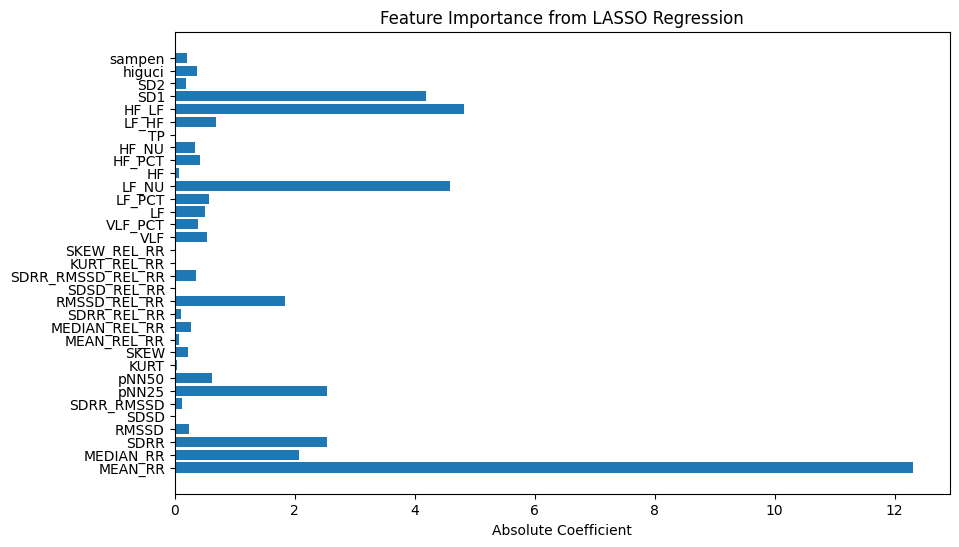

In [12]:
# Plot the feature importances from LASSO regression
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Absolute_Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance from LASSO Regression')
plt.show()

In [13]:
X_train = X
y_train = y
X_test = df_test[columns_of_interest]
y_test = df_test['HR']

# Standardize the features (important for LASSO regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
n_components = 10  # You can adjust the number of components based on your requirements
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a regression model using the transformed features
model = RandomForestRegressor()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Optional: Print the explained variance ratio for each principal component
print('Explained Variance Ratio:')
print(pca.explained_variance_ratio_)

# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Absolute Error: 0.5550660972343963
Explained Variance Ratio:
[0.26911622 0.25700511 0.19229034 0.07611034 0.03882661 0.03132203
 0.02942807 0.02779628 0.01882877 0.01552618]
R-squared: 0.9869293092136705


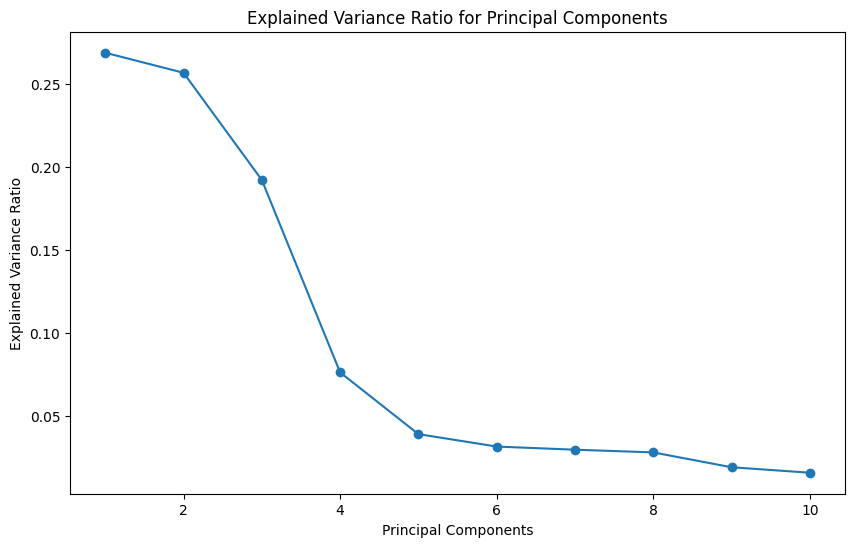

In [14]:
# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.show()

In [15]:
# Compute Mutual Information
mi_scores = mutual_info_regression(X, y)

# Create a DataFrame to display the results
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)

# Display the results
print(mi_df)

              Feature  Mutual_Information
0             MEAN_RR            3.121245
1           MEDIAN_RR            2.556716
2                SDRR            1.061363
30                SD2            1.060638
24             HF_PCT            1.019742
14        SDSD_REL_RR            1.007972
13       RMSSD_REL_RR            1.007922
23                 HF            0.971825
25              HF_NU            0.962945
22              LF_NU            0.962945
28              HF_LF            0.959972
15  SDRR_RMSSD_REL_RR            0.941736
27              LF_HF            0.926829
3               RMSSD            0.920208
4                SDSD            0.918752
29                SD1            0.918752
12        SDRR_REL_RR            0.912906
5          SDRR_RMSSD            0.868954
6               pNN25            0.851238
17        SKEW_REL_RR            0.681461
9                SKEW            0.681461
31             higuci            0.669110
26                 TP            0

In [16]:
X_train = X
y_train = y
X_test = df_test[columns_of_interest]
y_test = df_test['HR']

# Support Vector Regression (SVR) with RBF kernel
svr_rbf = SVR(kernel='rbf', gamma='scale', C=1.0, epsilon=0.1)

# Train the model
svr_rbf.fit(X_train, y_train)

print("Accuracy for RBF kernelized SVR:",svr_rbf.score(X_test,y_test))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_rbf.predict(X_test))))

Accuracy for RBF kernelized SVR: 0.8422333810129791
RMSE for RBF kernelized SVR: 3.16452633553


In [17]:
# Grid search for hyperparameter tuning
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)
grid.fit(X_train,y_train)

# Get the best estimator from grid search
grid.best_estimator_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


SVR(C=5)

In [18]:
svr_best=SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.5)
svr_best.fit(X_train, y_train)

print("RMSE for hypertuned RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_best.predict(X_test))))
print("Accuracy for hypertuned RBF kernelized SVR:",svr_best.score(X_test,y_test))

RMSE for hypertuned RBF kernelized SVR: 1.4809117467025448
Accuracy for hypertuned RBF kernelized SVR: 0.9654493640185704


In [19]:
# Feature elimination using RFE with Random Forest Regressor
X_train = X
y_train = y
X_test = df_test[columns_of_interest]
y_test = df_test['HR']

# Standardize the features (important for LASSO regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a model (e.g., Random Forest Regressor)
model = RandomForestRegressor()

# Initialize Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select = None)  # Set the desired number of features

# Fit RFE on the training data
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Fit the model on the selected features
model.fit(X_train_rfe, y_train)

# Make predictions on the test set
X_test_rfe = rfe.transform(X_test)
y_pred = model.predict(X_test_rfe)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get the selected features
selected_features = X.columns[rfe.support_]
print('Selected Features:', selected_features)

# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 0.04421593216185782
Selected Features: Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'SDRR_RMSSD', 'KURT', 'SDRR_REL_RR',
       'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'VLF', 'LF_NU',
       'HF', 'HF_PCT', 'SD2', 'higuci', 'sampen'],
      dtype='object')
R-squared: 0.9993034112196072


In [20]:
# Feature selection using Recursive Feature Elimination (RFE)
X_train = X
y_train = y
X_test = df_test[columns_of_interest]
y_test = df_test['HR']

# Standardize the features (important for LASSO regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a model (you can use any model suitable for regression)
model = RandomForestRegressor()

# Initialize Recursive Feature Elimination (RFE) with the model and the number of features to select at each step
rfe = RFE(model, n_features_to_select=None)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Now you can train your model on the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get the selected features
selected_features = X.columns[rfe.support_]
print('Selected Features:', selected_features)

# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 0.02725280654669211
Selected Features: Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'SDRR_RMSSD', 'SDRR_REL_RR',
       'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR',
       'VLF', 'HF', 'HF_PCT', 'HF_LF', 'SD2', 'higuci', 'sampen'],
      dtype='object')
R-squared: 0.9995706525149092


In [21]:
y_pred

array([75.20795882, 80.79423007, 62.37153329, 66.50363976, 64.25165112,
       56.34112774, 75.23607536, 62.44428628, 56.25442095, 71.02041249])